In [1]:
!pip install pandas numpy matplotlib statsmodels

In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [35]:
df = pd.read_csv('/IGP Notebooks/Prepared Data/AAPL_stock_data_2020-01-01_to_2023-12-31.csv')

In [36]:
# Assuming df is your DataFrame and it includes a 'Date' and 'Close' column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
close_prices = df['Close']

In [37]:
split_point = int(len(close_prices) * 0.8)
train, test = close_prices[:split_point], close_prices[split_point:]

In [38]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
forecast_steps = len(test)
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean

# Optional: Calculate the confidence intervals for the forecasts
conf_int = forecast_result.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 951.0376716086305


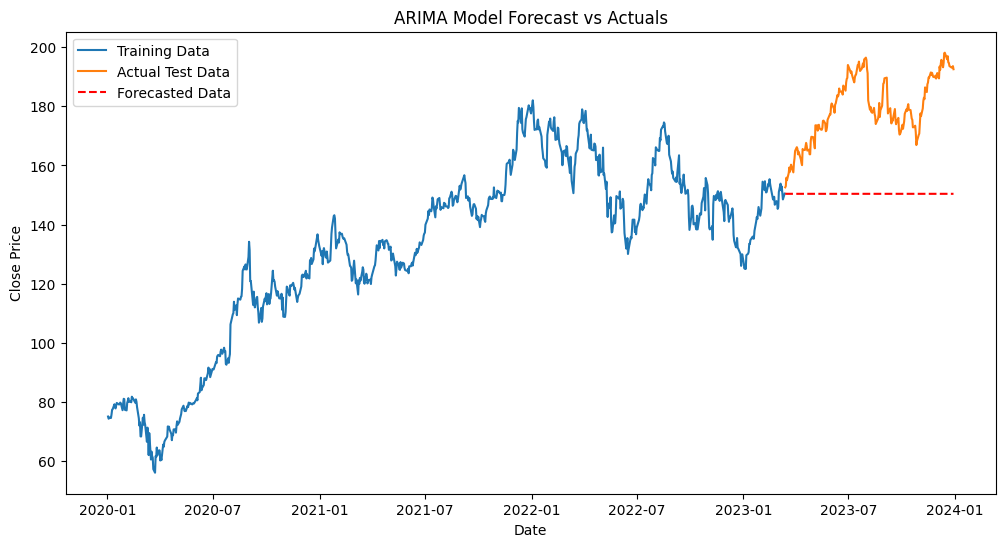

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecasted Data', color='red', linestyle='--')
#plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()